# Wine Quality Prediction with MLFlow and Scikit-Learn

In this notebook, we'll use the Wine Quality dataset to predict wine quality ratings based on chemical properties.

**Dataset:** Wine Quality Dataset 

**Task:** Multi-class classification 

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import mlflow
import mlflow.sklearn
import warnings
warnings.filterwarnings('ignore')

print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"mlflow version: {mlflow.__version__}")

pandas version: 2.3.3
numpy version: 1.26.4
mlflow version: 3.6.0


## 2. Load the Dataset

The dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality


In [2]:
# Load the dataset
df = pd.read_csv('data/winequality-red.csv', sep=';')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

Dataset shape: (1599, 12)

Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


## 3. Exploratory Data Analysis

In [3]:
# Display first few rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Basic statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Check data types
print("\nData types:")
print(df.dtypes)

Missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data types:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


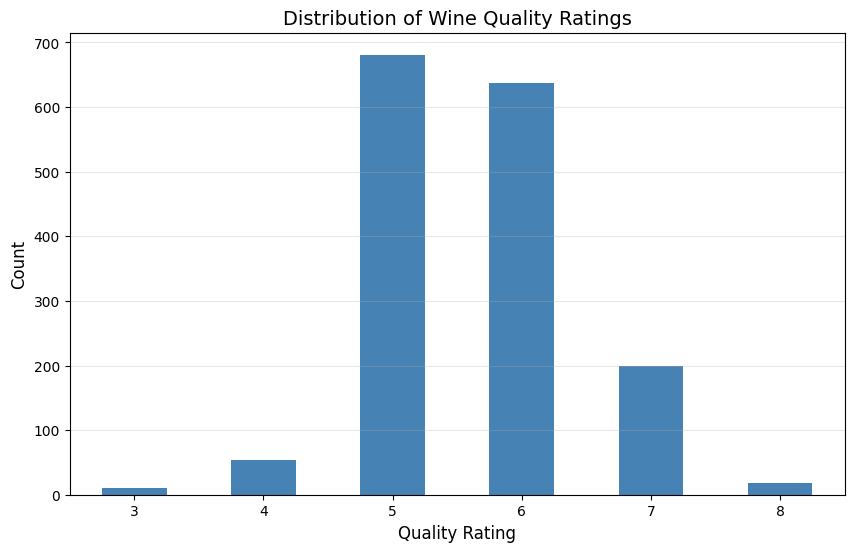


Quality distribution:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


In [6]:
# Distribution of wine quality
plt.figure(figsize=(10, 6))
df['quality'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title('Distribution of Wine Quality Ratings', fontsize=14)
plt.xlabel('Quality Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

print("\nQuality distribution:")
print(df['quality'].value_counts().sort_index())

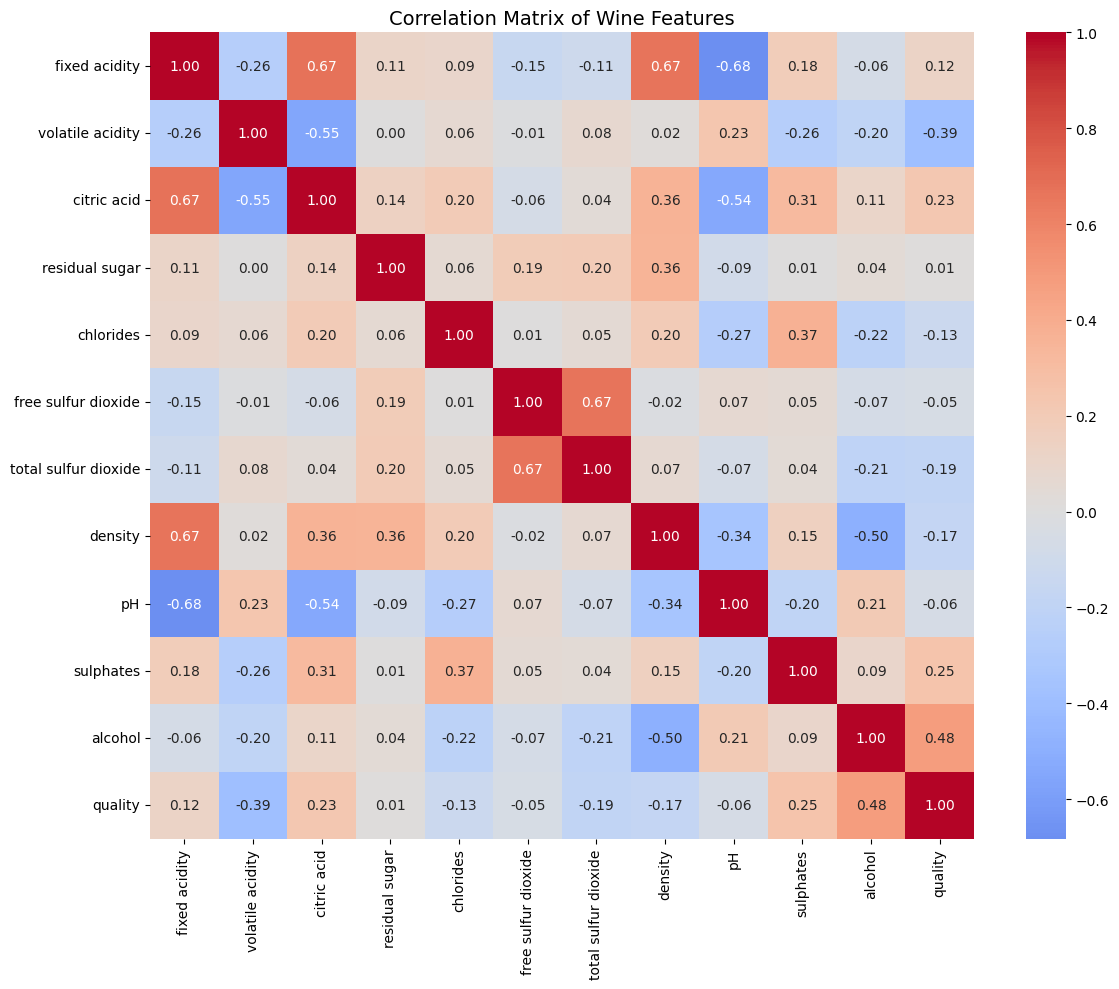

In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Wine Features', fontsize=14)
plt.tight_layout()
plt.show()

## 4. Data Preprocessing

In [8]:
# Separate features and target
X = df.drop('quality', axis=1)
y = df['quality']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature names: {X.columns.tolist()}")

Features shape: (1599, 11)
Target shape: (1599,)

Feature names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\nTraining set quality distribution:")
print(y_train.value_counts().sort_index())

Training set size: 1279
Test set size: 320

Training set quality distribution:
quality
3      8
4     42
5    545
6    510
7    159
8     15
Name: count, dtype: int64


In [10]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Features scaled successfully!")
print(f"Mean of scaled training features: {X_train_scaled.mean().mean():.6f}")
print(f"Std of scaled training features: {X_train_scaled.std().mean():.6f}")

Features scaled successfully!
Mean of scaled training features: -0.000000
Std of scaled training features: 1.000391


## 5. Model Training with MLFlow

We'll train three different models and compare their performance using MLFlow.

### 5.1 Random Forest Classifier

In [11]:
# Set experiment name
mlflow.set_experiment("wine_quality_sklearn")

# Random Forest
with mlflow.start_run(run_name="Random_Forest"):
    # Model parameters
    n_estimators = 100
    max_depth = 10
    random_state = 42
    
    # Log parameters
    mlflow.log_param("model_type", "Random Forest")
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_param("random_state", random_state)
    
    # Train model
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=random_state,
        n_jobs=-1
    )
    
    rf_model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred = rf_model.predict(X_train_scaled)
    y_test_pred = rf_model.predict(X_test_scaled)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Log metrics
    mlflow.log_metric("train_accuracy", train_accuracy)
    mlflow.log_metric("test_accuracy", test_accuracy)
    mlflow.log_metric("train_f1_score", train_f1)
    mlflow.log_metric("test_f1_score", test_f1)
    
    # Log model
    mlflow.sklearn.log_model(rf_model, "random_forest_model")
    
    # Get run ID
    rf_run_id = mlflow.active_run().info.run_id
    
    print(f"Random Forest Results:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Training F1-Score: {train_f1:.4f}")
    print(f"Test F1-Score: {test_f1:.4f}")
    print(f"\nRun ID: {rf_run_id}")

mlflow.end_run()

2025/11/16 16:25:26 INFO mlflow.tracking.fluent: Experiment with name 'wine_quality_sklearn' does not exist. Creating a new experiment.
2025/11/16 16:25:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/16 16:25:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest Results:
Training Accuracy: 0.9554
Test Accuracy: 0.6625
Training F1-Score: 0.9546
Test F1-Score: 0.6439

Run ID: 2a50f8bbefcb49ad8fbd959cb8ac53fe


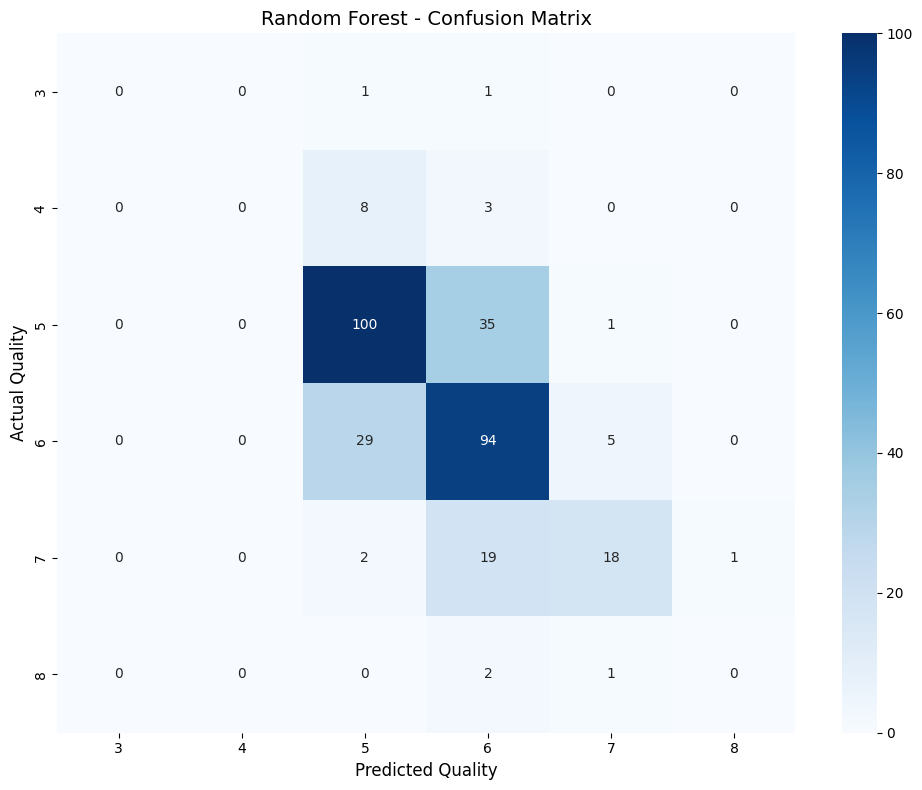

In [12]:
# Confusion Matrix for Random Forest
plt.figure(figsize=(10, 8))
cm_rf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y.unique()), 
            yticklabels=sorted(y.unique()))
plt.title('Random Forest - Confusion Matrix', fontsize=14)
plt.ylabel('Actual Quality', fontsize=12)
plt.xlabel('Predicted Quality', fontsize=12)
plt.tight_layout()
plt.show()

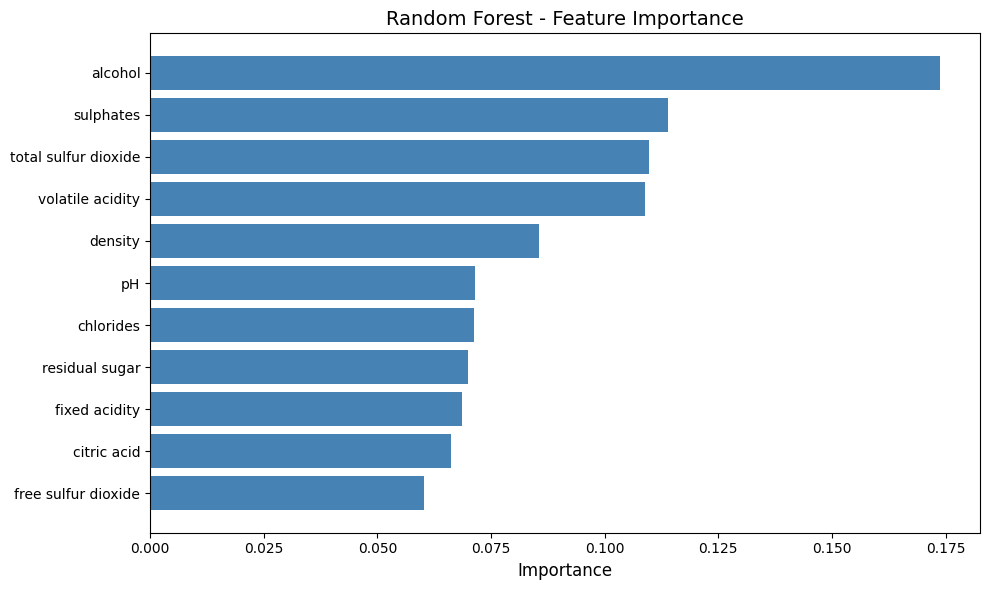


Top 5 Most Important Features:
                 feature  importance
10               alcohol    0.173879
9              sulphates    0.114001
6   total sulfur dioxide    0.109855
1       volatile acidity    0.108855
7                density    0.085648


In [13]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='steelblue')
plt.xlabel('Importance', fontsize=12)
plt.title('Random Forest - Feature Importance', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
print(feature_importance.head())

### 5.2 Logistic Regression

In [14]:
# Logistic Regression
with mlflow.start_run(run_name="Logistic_Regression"):
    # Model parameters
    max_iter = 1000
    random_state = 42
    
    # Log parameters
    mlflow.log_param("model_type", "Logistic Regression")
    mlflow.log_param("max_iter", max_iter)
    mlflow.log_param("random_state", random_state)
    
    # Train model
    lr_model = LogisticRegression(
        max_iter=max_iter,
        random_state=random_state,
        multi_class='multinomial'
    )
    
    lr_model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred_lr = lr_model.predict(X_train_scaled)
    y_test_pred_lr = lr_model.predict(X_test_scaled)
    
    # Calculate metrics
    train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
    test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
    train_f1_lr = f1_score(y_train, y_train_pred_lr, average='weighted')
    test_f1_lr = f1_score(y_test, y_test_pred_lr, average='weighted')
    
    # Log metrics
    mlflow.log_metric("train_accuracy", train_accuracy_lr)
    mlflow.log_metric("test_accuracy", test_accuracy_lr)
    mlflow.log_metric("train_f1_score", train_f1_lr)
    mlflow.log_metric("test_f1_score", test_f1_lr)
    
    # Log model
    mlflow.sklearn.log_model(lr_model, "logistic_regression_model")
    
    # Get run ID
    lr_run_id = mlflow.active_run().info.run_id
    
    print(f"Logistic Regression Results:")
    print(f"Training Accuracy: {train_accuracy_lr:.4f}")
    print(f"Test Accuracy: {test_accuracy_lr:.4f}")
    print(f"Training F1-Score: {train_f1_lr:.4f}")
    print(f"Test F1-Score: {test_f1_lr:.4f}")
    print(f"\nRun ID: {lr_run_id}")

mlflow.end_run()

2025/11/16 16:26:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/16 16:26:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logistic Regression Results:
Training Accuracy: 0.6091
Test Accuracy: 0.5906
Training F1-Score: 0.5857
Test F1-Score: 0.5673

Run ID: 6cea4c94af314224b1f8f137d081efe2


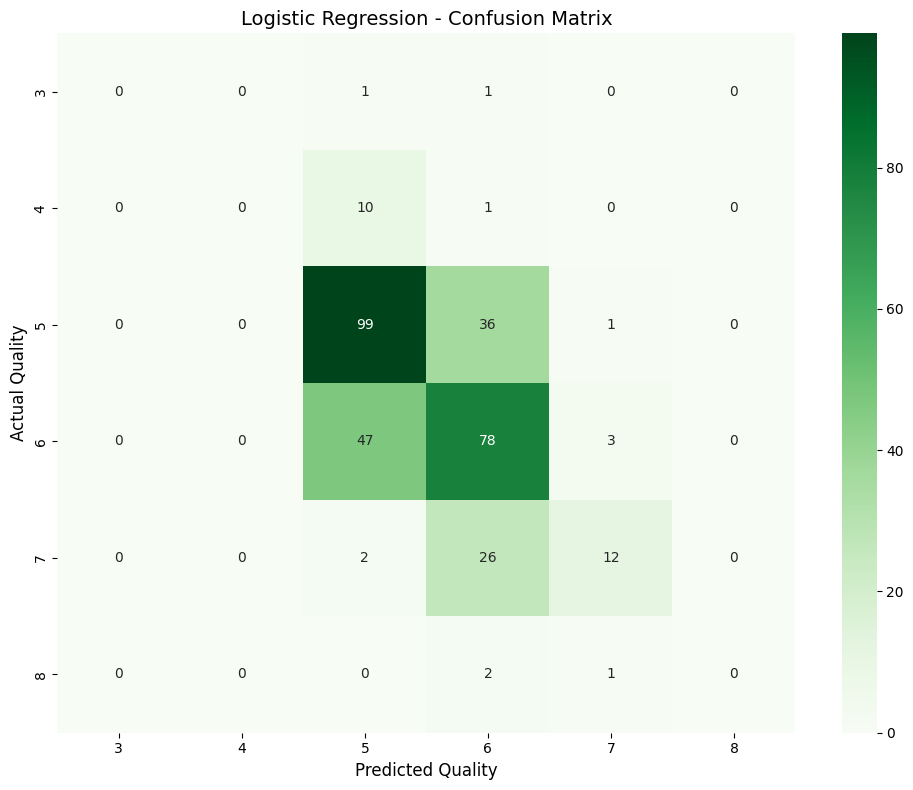

In [15]:
# Confusion Matrix for Logistic Regression
plt.figure(figsize=(10, 8))
cm_lr = confusion_matrix(y_test, y_test_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title('Logistic Regression - Confusion Matrix', fontsize=14)
plt.ylabel('Actual Quality', fontsize=12)
plt.xlabel('Predicted Quality', fontsize=12)
plt.tight_layout()
plt.show()

### 5.3 Decision Tree

In [16]:
# Decision Tree
with mlflow.start_run(run_name="Decision_Tree"):
    # Model parameters
    max_depth = 8
    random_state = 42
    
    # Log parameters
    mlflow.log_param("model_type", "Decision Tree")
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_param("random_state", random_state)
    
    # Train model
    dt_model = DecisionTreeClassifier(
        max_depth=max_depth,
        random_state=random_state
    )
    
    dt_model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred_dt = dt_model.predict(X_train_scaled)
    y_test_pred_dt = dt_model.predict(X_test_scaled)
    
    # Calculate metrics
    train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
    test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
    train_f1_dt = f1_score(y_train, y_train_pred_dt, average='weighted')
    test_f1_dt = f1_score(y_test, y_test_pred_dt, average='weighted')
    
    # Log metrics
    mlflow.log_metric("train_accuracy", train_accuracy_dt)
    mlflow.log_metric("test_accuracy", test_accuracy_dt)
    mlflow.log_metric("train_f1_score", train_f1_dt)
    mlflow.log_metric("test_f1_score", test_f1_dt)
    
    # Log model
    mlflow.sklearn.log_model(dt_model, "decision_tree_model")
    
    # Get run ID
    dt_run_id = mlflow.active_run().info.run_id
    
    print(f"Decision Tree Results:")
    print(f"Training Accuracy: {train_accuracy_dt:.4f}")
    print(f"Test Accuracy: {test_accuracy_dt:.4f}")
    print(f"Training F1-Score: {train_f1_dt:.4f}")
    print(f"Test F1-Score: {test_f1_dt:.4f}")
    print(f"\nRun ID: {dt_run_id}")

mlflow.end_run()

2025/11/16 16:26:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/16 16:26:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Decision Tree Results:
Training Accuracy: 0.8022
Test Accuracy: 0.5844
Training F1-Score: 0.7999
Test F1-Score: 0.5778

Run ID: 97601142d0f940b98b8621ddd2954211


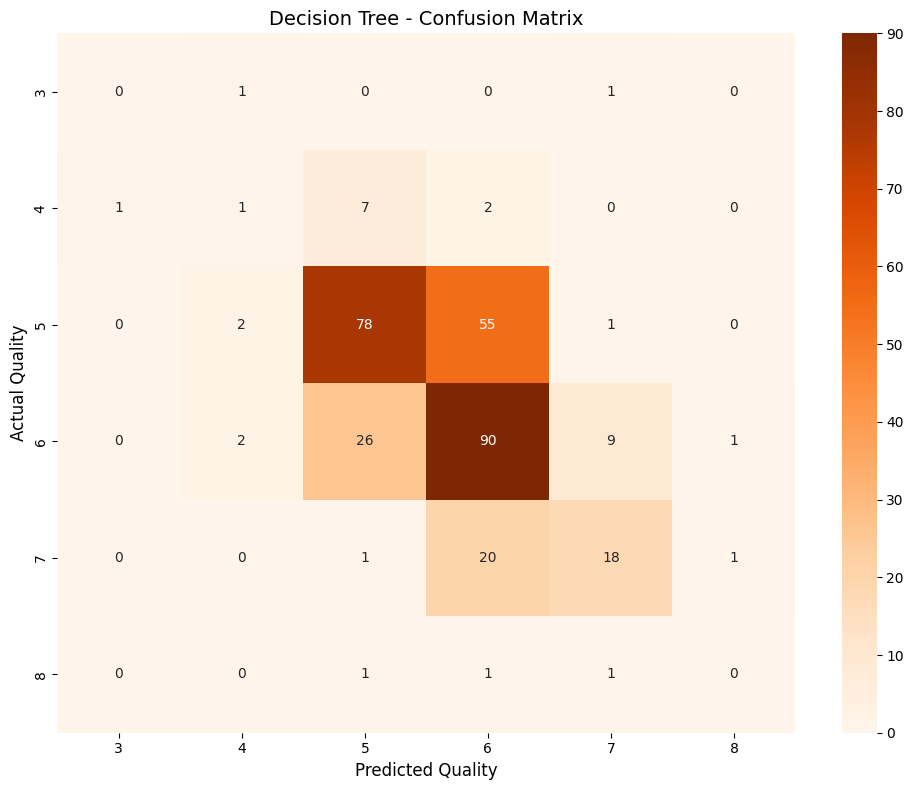

In [17]:
# Confusion Matrix for Decision Tree
plt.figure(figsize=(10, 8))
cm_dt = confusion_matrix(y_test, y_test_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title('Decision Tree - Confusion Matrix', fontsize=14)
plt.ylabel('Actual Quality', fontsize=12)
plt.xlabel('Predicted Quality', fontsize=12)
plt.tight_layout()
plt.show()

## 6. Model Comparison

In [18]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Train Accuracy': [train_accuracy, train_accuracy_lr, train_accuracy_dt],
    'Test Accuracy': [test_accuracy, test_accuracy_lr, test_accuracy_dt],
    'Train F1-Score': [train_f1, train_f1_lr, train_f1_dt],
    'Test F1-Score': [test_f1, test_f1_lr, test_f1_dt]
})

print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)


MODEL COMPARISON
              Model  Train Accuracy  Test Accuracy  Train F1-Score  Test F1-Score
      Random Forest        0.955434       0.662500        0.954632       0.643868
Logistic Regression        0.609070       0.590625        0.585742       0.567298
      Decision Tree        0.802189       0.584375        0.799854       0.577838


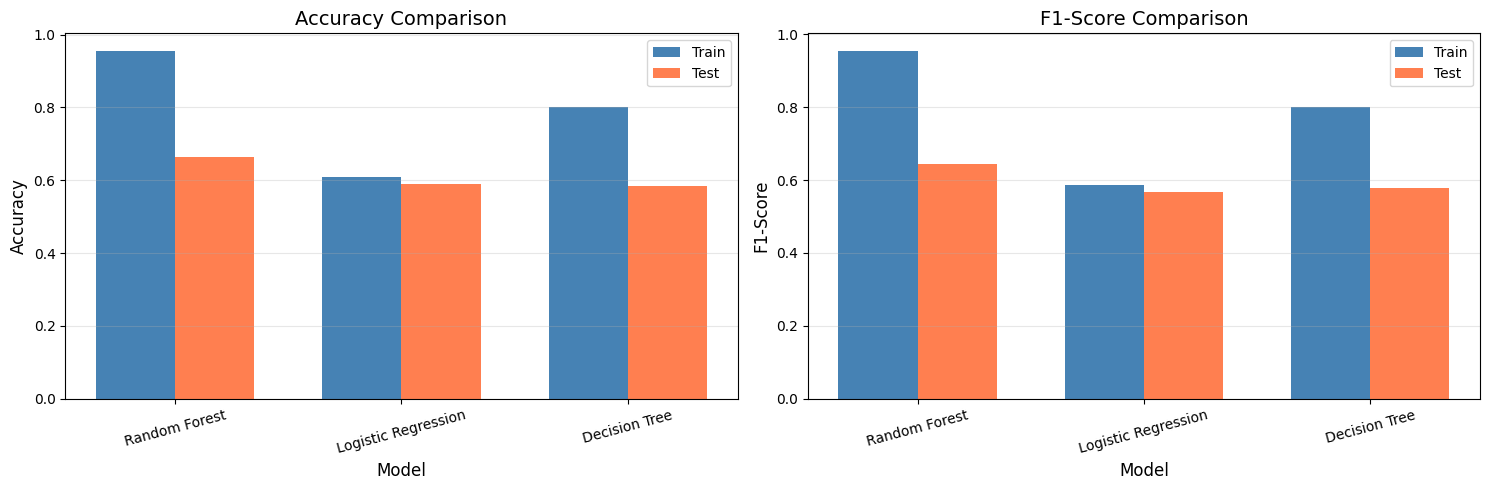

In [19]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy comparison
x = np.arange(len(comparison_df))
width = 0.35

axes[0].bar(x - width/2, comparison_df['Train Accuracy'], width, label='Train', color='steelblue')
axes[0].bar(x + width/2, comparison_df['Test Accuracy'], width, label='Test', color='coral')
axes[0].set_xlabel('Model', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Accuracy Comparison', fontsize=14)
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison_df['Model'], rotation=15)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# F1-Score comparison
axes[1].bar(x - width/2, comparison_df['Train F1-Score'], width, label='Train', color='steelblue')
axes[1].bar(x + width/2, comparison_df['Test F1-Score'], width, label='Test', color='coral')
axes[1].set_xlabel('Model', fontsize=12)
axes[1].set_ylabel('F1-Score', fontsize=12)
axes[1].set_title('F1-Score Comparison', fontsize=14)
axes[1].set_xticks(x)
axes[1].set_xticklabels(comparison_df['Model'], rotation=15)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Load Best Model and Test

In [20]:
# Load the Random Forest model (best performer)
print(f"Loading Random Forest model with Run ID: {rf_run_id}")
loaded_model = mlflow.sklearn.load_model(f"runs:/{rf_run_id}/random_forest_model")

# Test the loaded model
test_predictions = loaded_model.predict(X_test_scaled)
test_acc = accuracy_score(y_test, test_predictions)

print(f"\nLoaded model test accuracy: {test_acc:.4f}")
print("Model loaded successfully!")

Loading Random Forest model with Run ID: 2a50f8bbefcb49ad8fbd959cb8ac53fe



Loaded model test accuracy: 0.6625
Model loaded successfully!


In [21]:
# Make prediction on a sample wine
sample_wine = X_test_scaled.iloc[0:1]
actual_quality = y_test.iloc[0]
predicted_quality = loaded_model.predict(sample_wine)[0]

print("Sample Wine Properties:")
print(sample_wine.T)
print(f"\nActual Quality: {actual_quality}")
print(f"Predicted Quality: {predicted_quality}")

if predicted_quality == actual_quality:
    print("\n✓ Correct prediction!")
else:
    print(f"\n✗ Incorrect prediction (difference: {abs(predicted_quality - actual_quality)})")

Sample Wine Properties:
                             0
fixed acidity         0.291215
volatile acidity     -1.452779
citric acid           0.596029
residual sugar       -0.395292
chlorides             0.217139
free sulfur dioxide   0.369853
total sulfur dioxide -0.608632
density              -0.688798
pH                   -1.046490
sulphates             0.147654
alcohol               0.728045

Actual Quality: 6
Predicted Quality: 7

✗ Incorrect prediction (difference: 1)
